<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


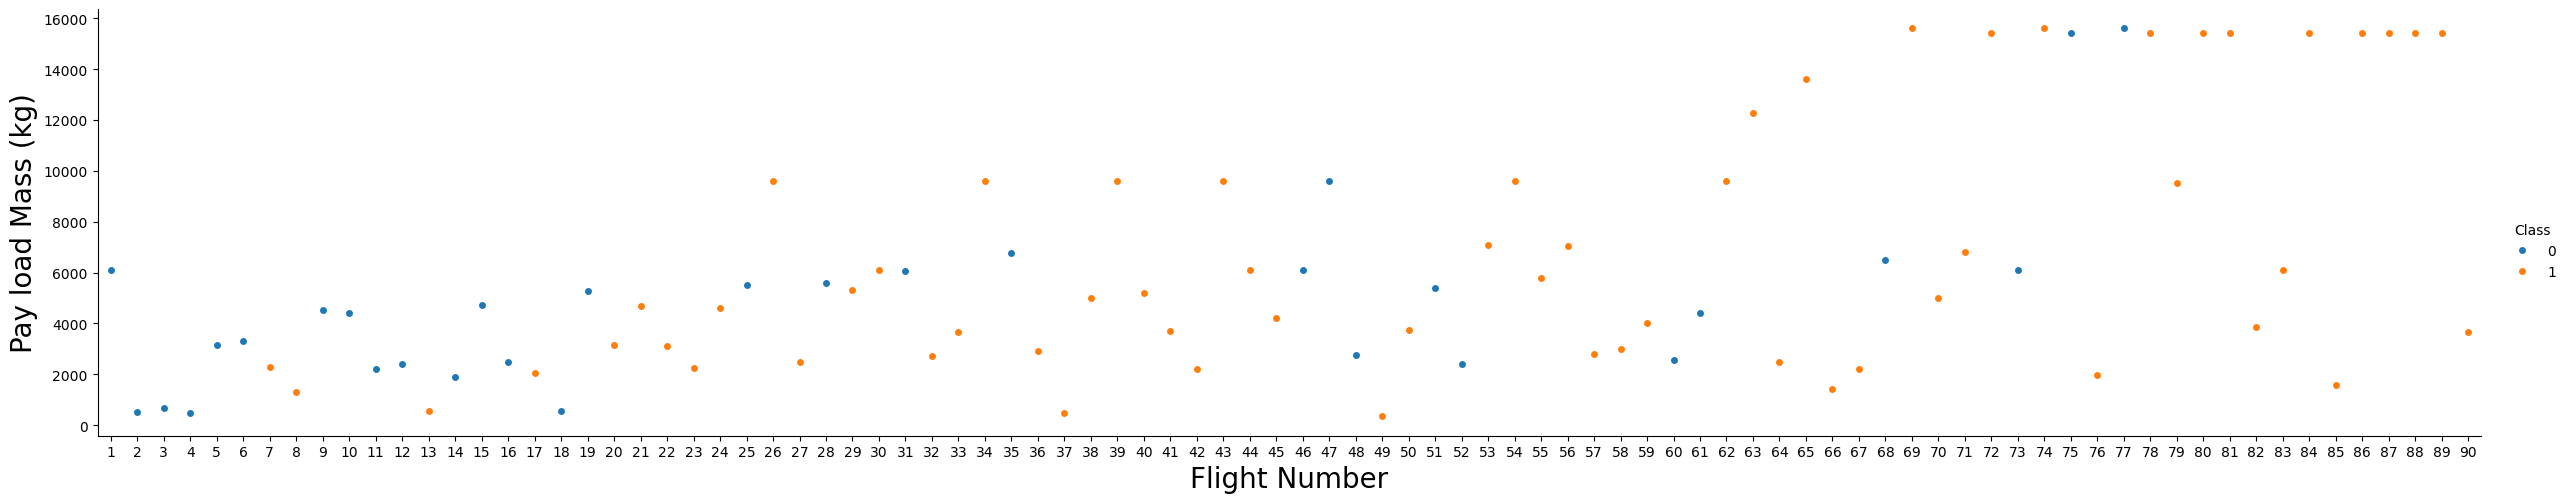

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


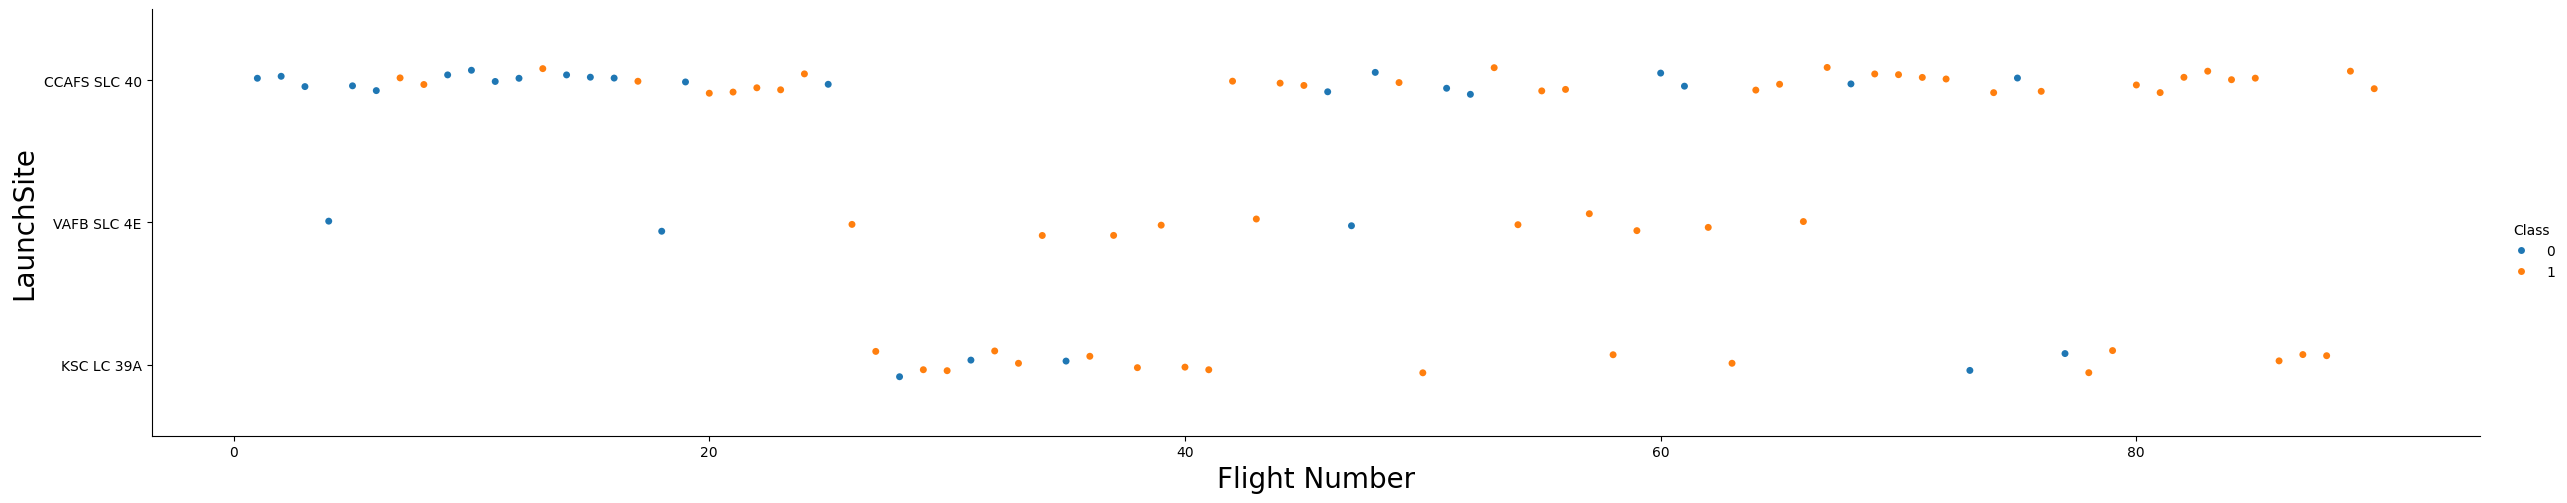

In [8]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


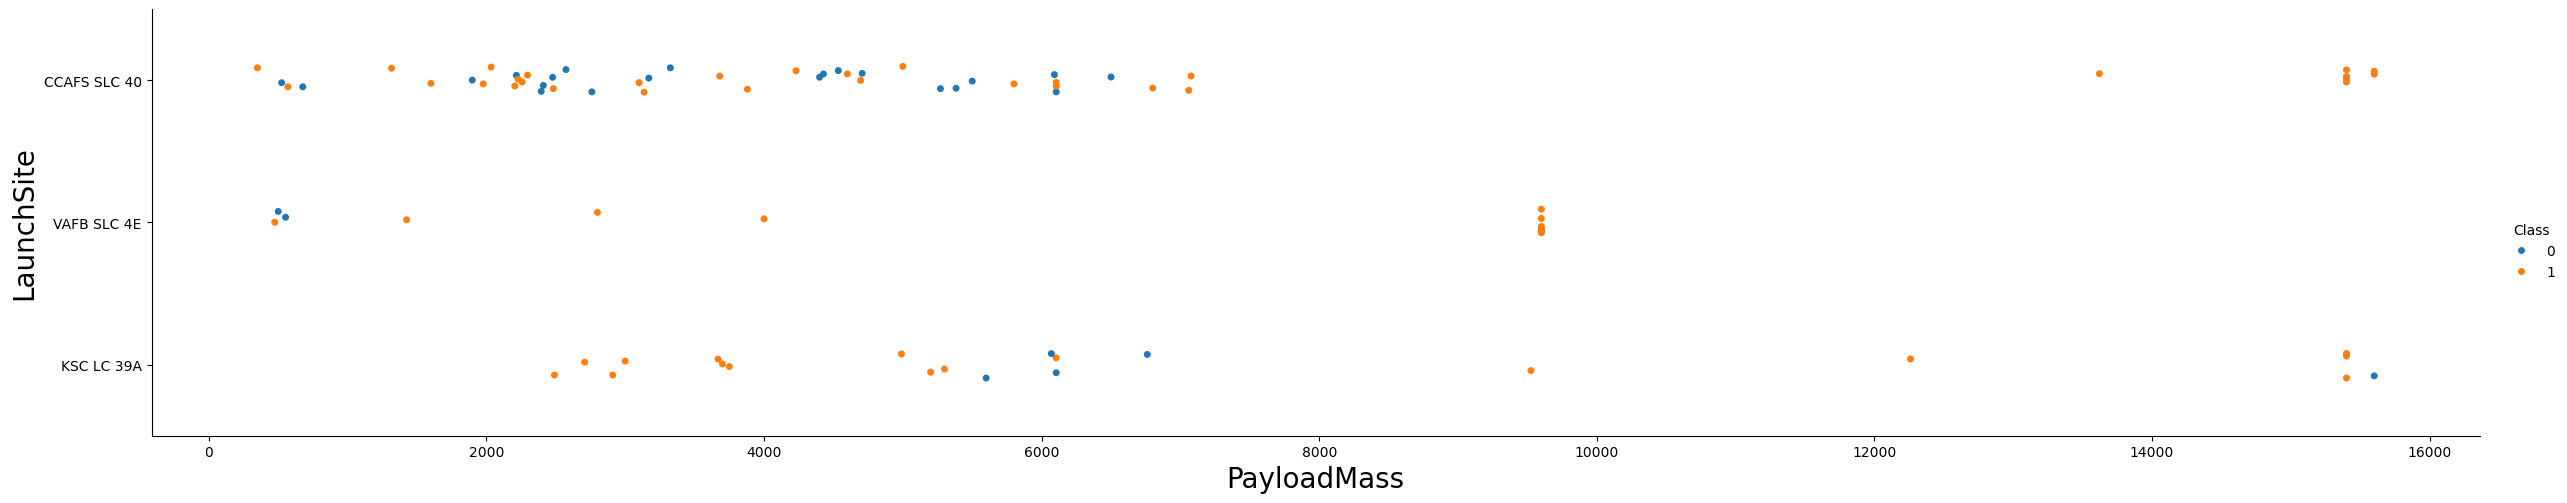

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-17-4fb1e3d6e088>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')


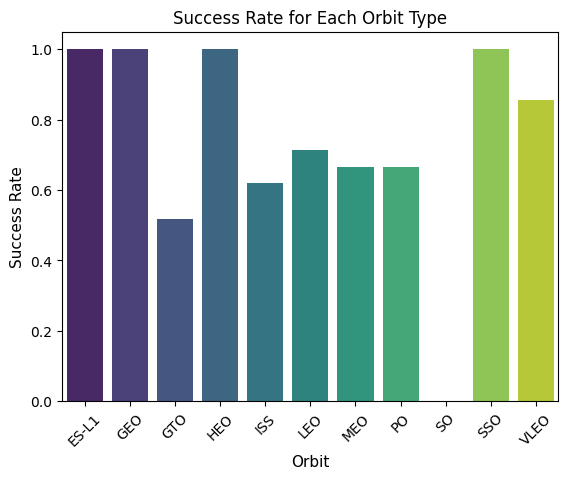

In [17]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Grouping by Orbit and calculating the mean of Class to get the success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plotting the bar chart with success rate for each orbit type
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')

# Adding labels and title
plt.xlabel("Orbit", fontsize=11)
plt.ylabel("Success Rate", fontsize=11)  # This is actually the success rate now
plt.title("Success Rate for Each Orbit Type", fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


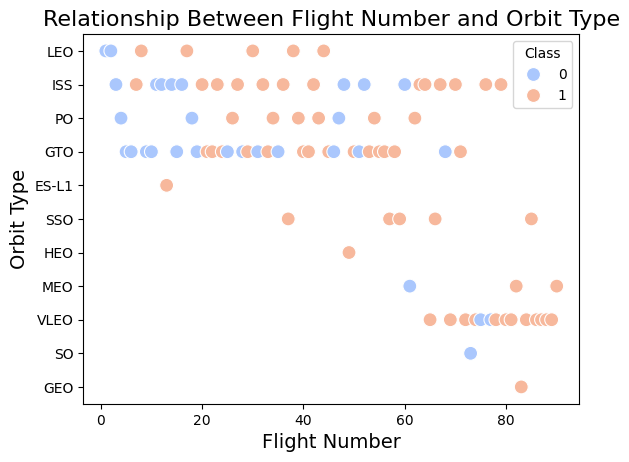

In [18]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a scatter plot with FlightNumber on the x-axis, Orbit on the y-axis, and hue based on Class
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='coolwarm', s=100)

# Adding labels and title
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship Between Flight Number and Orbit Type", fontsize=16)

# Displaying the plot
plt.legend(title="Class", loc="upper right")
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


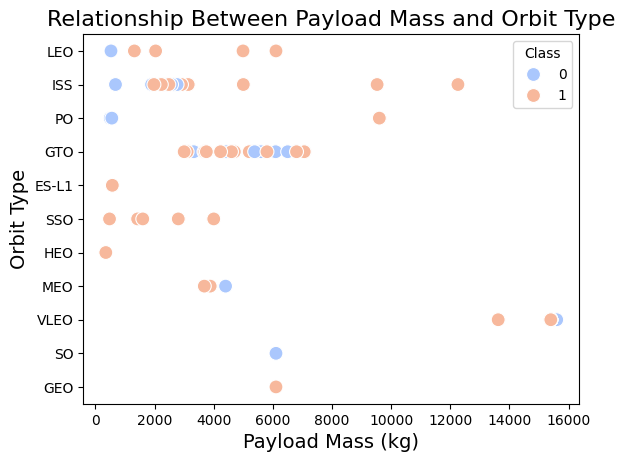

In [19]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a scatter plot with Payload Mass on the x-axis, Orbit on the y-axis, and hue based on Class
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='coolwarm', s=100)

# Adding labels and title
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship Between Payload Mass and Orbit Type", fontsize=16)

# Displaying the plot
plt.legend(title="Class", loc="upper right")
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


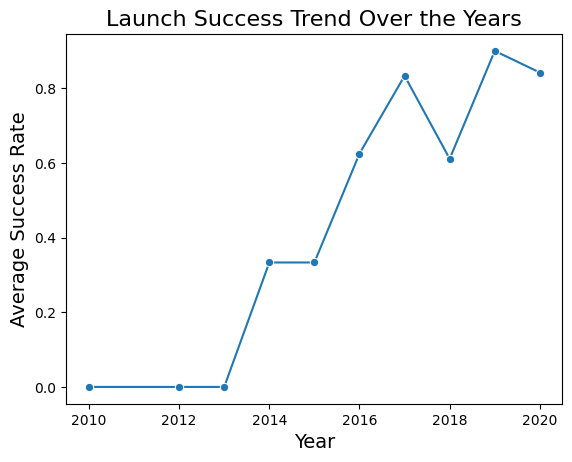

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # This converts the Date column to datetime, any invalid values will become NaT

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Grouping by 'Year' and calculating the mean of 'Class' to get the average success rate
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the line chart
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o')

# Adding labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Trend Over the Years", fontsize=16)

# Displaying the plot
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [25]:
# Get the sorted list of unique launch sites
unique_launch_sites_sorted = sorted(df['LaunchSite'].unique())

# Print the sorted unique launch sites
print(unique_launch_sites_sorted)


['CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E']


In [26]:
# Filter the DataFrame to find records where the LaunchSite begins with 'CCA'
filtered_df = df[df['LaunchSite'].str.startswith('CCA', na=False)]

# Display the first 5 records
filtered_df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-01-01,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-01-01,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-01-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
4,5,2013-01-01,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
5,6,2014-01-01,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014


In [27]:
# Filter the DataFrame to get records where LaunchSite contains 'NASA'
nasa_df = df[df['LaunchSite'].str.contains('NASA', na=False)]

# Calculate the total payload carried by NASA boosters
total_payload_nasa = nasa_df['PayloadMass'].sum()

# Print the total payload
print(f"Total payload carried by NASA boosters: {total_payload_nasa} kg")


Total payload carried by NASA boosters: 0.0 kg


In [28]:
# Filter the DataFrame to get records where BoosterVersion is 'F9 v1.1'
f9_v1_1_df = df[df['BoosterVersion'] == 'F9 v1.1']

# Calculate the average payload mass carried by F9 v1.1
average_payload_f9_v1_1 = f9_v1_1_df['PayloadMass'].mean()

# Print the average payload mass
print(f"Average payload mass carried by F9 v1.1: {average_payload_f9_v1_1} kg")


Average payload mass carried by F9 v1.1: nan kg


In [30]:
# Convert 'Date' column to datetime (if not already)
successful_landings_ground_pad['Date'] = pd.to_datetime(successful_landings_ground_pad['Date'], errors='coerce')

# Drop rows with NaT values in 'Date' column
successful_landings_ground_pad = successful_landings_ground_pad.dropna(subset=['Date'])

# Get the earliest date of successful landing on a ground pad
first_successful_landing_date = successful_landings_ground_pad['Date'].min()

# Print the first successful landing date
print(f"The date of the first successful landing on a ground pad is: {first_successful_landing_date}")


The date of the first successful landing on a ground pad is: NaT


In [29]:
# Filter the DataFrame to get records where the landing is successful and on a ground pad
successful_landings_ground_pad = df[(df['Class'] == 1) & (df['LandingPad'].str.contains('GND', na=False))]

# Get the earliest date of successful landing on a ground pad
first_successful_landing_date = successful_landings_ground_pad['Date'].min()

# Print the first successful landing date
print(f"The date of the first successful landing on a ground pad is: {first_successful_landing_date}")


The date of the first successful landing on a ground pad is: NaT


In [33]:
# Filter the DataFrame for successful landings on a drone ship with payload mass between 4000 and 6000
filtered_boosters = df[
    (df['Class'] == 1) & 
    (df['LandingPad'].str.contains('DS', na=False)) & 
    (df['PayloadMass'] > 4000) & 
    (df['PayloadMass'] < 6000)
]

# Get the names of boosters (BoosterVersion column contains the booster version)
booster_versions = filtered_boosters['BoosterVersion'].unique()

# Print the names of the boosters
print("Boosters that have successfully landed on a drone ship with payload mass between 4000 and 6000:")
print(booster_versions)


Boosters that have successfully landed on a drone ship with payload mass between 4000 and 6000:
[]


In [32]:
# Print the column names to check for the correct one
print(df.columns)


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [34]:
# Check the unique values in the 'LandingPad' column to ensure the correct identifier for drone ships
print("Unique LandingPad values:", df['LandingPad'].unique())

# Filter the DataFrame for successful landings on a drone ship with payload mass between 4000 and 6000
filtered_boosters = df[
    (df['Class'] == 1) &  # Successful landings
    (df['LandingPad'].str.contains('DS', na=False)) &  # Landing on a drone ship (adjust 'DS' if needed)
    (df['PayloadMass'] > 4000) &  # Payload mass greater than 4000
    (df['PayloadMass'] < 6000)   # Payload mass less than 6000
]

# Get the booster versions (assuming 'BoosterVersion' is the correct column for boosters)
booster_versions = filtered_boosters['BoosterVersion'].unique()

# Print the names of the boosters
if booster_versions.size > 0:
    print("Boosters that have successfully landed on a drone ship with payload mass between 4000 and 6000:")
    print(booster_versions)
else:
    print("No boosters found with the specified criteria.")


Unique LandingPad values: [nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9']
No boosters found with the specified criteria.


In [35]:
# Check unique landing pad identifiers
print("Unique LandingPad values:", df['LandingPad'].unique())


Unique LandingPad values: [nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9']


In [36]:
# Filter for successful landings on a drone ship (no payload mass condition yet)
successful_landings_on_ds = df[(df['Class'] == 1) & (df['LandingPad'].str.contains('DS', na=False))]
print("Successful landings on drone ships:", successful_landings_on_ds)


Successful landings on drone ships: Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude, Class, Year]
Index: []


In [37]:
# Filter for payload mass between 4000 and 6000 (no other conditions yet)
payload_mass_range = df[(df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]
print("Payload mass in the range (4000-6000):", payload_mass_range[['PayloadMass', 'LandingPad']])


Payload mass in the range (4000-6000):     PayloadMass                LandingPad
8       4535.00                       NaN
9       4428.00                       NaN
14      4707.00                       NaN
18      5271.00  5e9e3032383ecb6bb234e7ca
20      4696.00  5e9e3032383ecb6bb234e7ca
23      4600.00  5e9e3032383ecb6bb234e7ca
24      5500.00  5e9e3032383ecb6bb234e7ca
27      5600.00                       NaN
28      5300.00  5e9e3032383ecb6bb234e7ca
37      4990.00  5e9e3032383ecb267a34e7c7
39      5200.00  5e9e3032383ecb6bb234e7ca
44      4230.00                       NaN
50      5383.85                       NaN
54      5800.00  5e9e3032383ecb6bb234e7ca
60      4400.00                       NaN
69      5000.00  5e9e3032383ecb6bb234e7ca


In [38]:
# Check the unique values in the LandingPad column to understand the format
print("Unique LandingPad values:", df['LandingPad'].unique())

# Now filter for successful landings on a drone ship with payload mass between 4000 and 6000
filtered_boosters = df[
    (df['Class'] == 1) &  # Successful landings
    (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)  # Payload mass range
]

# Check the rows with non-null LandingPad
filtered_boosters_with_pad = filtered_boosters[filtered_boosters['LandingPad'].notna()]

# Now check the filtered data to see if landing pad identifiers correspond to drone ships
print("Filtered boosters with non-null LandingPad:")
print(filtered_boosters_with_pad[['PayloadMass', 'LandingPad']])

# Assuming you found the correct landing pad identifiers (e.g., '5e9e3032383ecb6bb234e7ca'), filter again
# Example: Let's assume '5e9e3032383ecb6bb234e7ca' corresponds to a drone ship
drone_ship_boosters = filtered_boosters_with_pad[filtered_boosters_with_pad['LandingPad'].str.contains('5e9e3032383ecb6bb234e7ca')]

# Display the result for drone ship landings
print("Boosters that have successfully landed on a drone ship with payload mass between 4000 and 6000:")
print(drone_ship_boosters[['BoosterVersion', 'PayloadMass', 'LandingPad']])


Unique LandingPad values: [nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9']
Filtered boosters with non-null LandingPad:
    PayloadMass                LandingPad
20       4696.0  5e9e3032383ecb6bb234e7ca
23       4600.0  5e9e3032383ecb6bb234e7ca
28       5300.0  5e9e3032383ecb6bb234e7ca
37       4990.0  5e9e3032383ecb267a34e7c7
39       5200.0  5e9e3032383ecb6bb234e7ca
54       5800.0  5e9e3032383ecb6bb234e7ca
69       5000.0  5e9e3032383ecb6bb234e7ca
Boosters that have successfully landed on a drone ship with payload mass between 4000 and 6000:
   BoosterVersion  PayloadMass                LandingPad
20       Falcon 9       4696.0  5e9e3032383ecb6bb234e7ca
23       Falcon 9       4600.0  5e9e3032383ecb6bb234e7ca
28       Falcon 9       5300.0  5e9e3032383ecb6bb234e7ca
39       Falcon 9       5200.0  5e9e3032383ecb6bb234e7ca
54       Falcon 9       5800.0  5e9e3032383ecb6bb234e7ca
69       Falc

In [39]:
# Calculate the total number of successful and failed mission outcomes
success_count = df[df['Class'] == 1].shape[0]  # Successful missions (Class == 1)
failure_count = df[df['Class'] == 0].shape[0]  # Failed missions (Class == 0)

# Print the results
print(f"Total number of successful missions: {success_count}")
print(f"Total number of failed missions: {failure_count}")


Total number of successful missions: 60
Total number of failed missions: 30


In [40]:
# Find the row with the maximum payload mass
max_payload_row = df.loc[df['PayloadMass'].idxmax()]

# Get the booster version and the corresponding payload mass
booster_with_max_payload = max_payload_row['BoosterVersion']
max_payload_mass = max_payload_row['PayloadMass']

# Print the results
print(f"The booster that carried the maximum payload mass is: {booster_with_max_payload}")
print(f"The maximum payload mass is: {max_payload_mass}")


The booster that carried the maximum payload mass is: Falcon 9
The maximum payload mass is: 15600.0


In [41]:
# Filter for failed landings (Class == 0) on a drone ship (LandingPad contains 'DS')
failed_landings_on_ds_2015 = df[
    (df['Class'] == 0) &  # Failed landings
    (df['LandingPad'].str.contains('DS', na=False)) &  # Landing on a drone ship
    (df['Year'] == 2015)  # Missions in the year 2015
]

# Get the relevant columns: booster version, landing outcome, and launch site
failed_landings_info = failed_landings_on_ds_2015[['BoosterVersion', 'LaunchSite', 'Class']]

# Print the result
print("Failed landing outcomes on drone ships in 2015:")
print(failed_landings_info)


Failed landing outcomes on drone ships in 2015:
Empty DataFrame
Columns: [BoosterVersion, LaunchSite, Class]
Index: []


In [42]:
# Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for the date range between 2010-06-04 and 2017-03-20
filtered_df = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

# Create a new column to describe the outcome and landing pad type
filtered_df['LandingOutcome'] = filtered_df.apply(
    lambda row: f"Failure ({row['LandingPad']})" if row['Class'] == 0 else f"Success ({row['LandingPad']})", axis=1
)

# Group by the landing outcome and count the occurrences
outcome_counts = filtered_df['LandingOutcome'].value_counts()

# Sort the counts in descending order
outcome_counts_sorted = outcome_counts.sort_values(ascending=False)

# Print the ranked counts of landing outcomes
print(outcome_counts_sorted)


<ipython-input-42-6e32cd574860>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['LandingOutcome'] = filtered_df.apply(


LandingOutcome
Failure (nan)                         12
Success (5e9e3032383ecb267a34e7c7)     8
Success (5e9e3032383ecb6bb234e7ca)     8
Success (nan)                          4
Success (5e9e3033383ecbb9e534e7cc)     4
Failure (5e9e3032383ecb6bb234e7ca)     3
Failure (5e9e3032383ecb761634e7cb)     2
Failure (5e9e3033383ecbb9e534e7cc)     1
Name: count, dtype: int64


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
